## Making trials for highest 3 variances of subcarriers

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1
 Total subcarriers: 360
 Top 3 subcarriers with highest variance:
  1. 13 (Variance = 41.94)
  2. 16 (Variance = 28.52)
  3. 205 (Variance = 22.34)

 Processing subcarrier: 13
 Detected 3 trials for 13:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_13_1110_1274.csv (range 1110-1274)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_13_1336_1681.csv (range 1336-1681)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_13_1736_1874.csv (range 1736-1874)


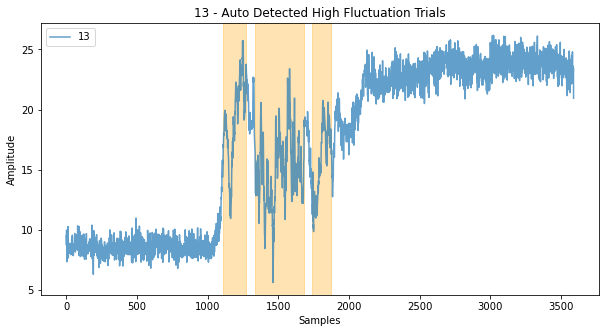


 Processing subcarrier: 16
 Detected 2 trials for 16:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_16_1111_1261.csv (range 1111-1261)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_16_1510_1885.csv (range 1510-1885)


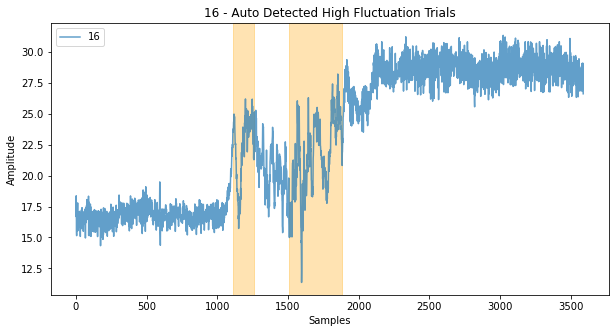


 Processing subcarrier: 205
 Detected 3 trials for 205:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_205_1117_1279.csv (range 1117-1279)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_205_1343_1714.csv (range 1343-1714)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_205_1740_1860.csv (range 1740-1860)


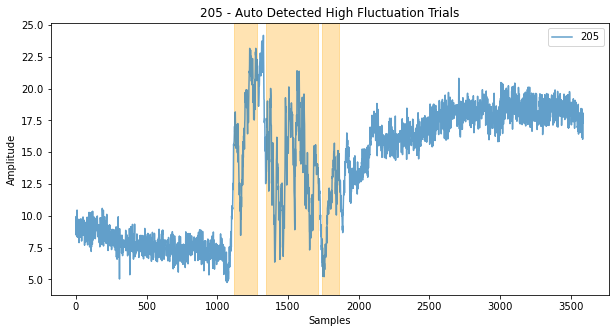

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1"
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find top 3 subcarriers with highest variance ======
variances = df.var(axis=0)
top_subs = variances.nlargest(3).index   # top 3 subcarriers
print(f" Total subcarriers: {len(df.columns)}")
print(" Top 3 subcarriers with highest variance:")
for i, sub in enumerate(top_subs, start=1):
    print(f"  {i}. {sub} (Variance = {variances[sub]:.2f})")

# ====== Step 4: Loop through each subcarrier ======
window_size = 100  # adjust depending on signal smoothness
for sub in top_subs:
    print(f"\n Processing subcarrier: {sub}")
    signal = df[sub].values
    rolling_std = pd.Series(signal).rolling(window=window_size).std()

    # Detect high-fluctuation regions
    threshold = rolling_std.mean() + rolling_std.std()
    high_var = rolling_std > threshold

    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(high_var):
        if val and not in_segment:
            start = i
            in_segment = True
        elif not val and in_segment:
            end = i
            if end - start > window_size:
                segments.append((start, end))
            in_segment = False

    if in_segment:
        segments.append((start, len(signal)))

    # Save each detected region as a trial
    print(f" Detected {len(segments)} trials for {sub}:")
    for idx, (start_idx, end_idx) in enumerate(segments, start=1):
        trial = df.loc[start_idx:end_idx, [sub]]
        filename = os.path.join(save_path, f"trial_{sub}_{start_idx}_{end_idx}.csv")
        trial.to_csv(filename, index=False)
        print(f" Saved {filename} (range {start_idx}-{end_idx})")

    # Plot the signal with shaded trials
    plt.figure(figsize=(10, 5))
    plt.plot(signal, label=f'{sub}', alpha=0.7)
    for (start, end) in segments:
        plt.axvspan(start, end, color='orange', alpha=0.3)
    plt.title(f"{sub} - Auto Detected High Fluctuation Trials")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


## Making trials for highest 3 variances of subcarriers

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2
 Total subcarriers: 360
 Top 3 subcarriers with highest variance:
  1. 343 (Variance = 22.43)
  2. 250 (Variance = 21.45)
  3. 253 (Variance = 21.29)

 Processing subcarrier: 343
 Detected 4 trials for 343:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_2854_3023.csv (range 2854-3023)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_7517_7694.csv (range 7517-7694)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_11058_11168.csv (range 11058-11168)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_15200_15331.csv (range 15200-15331)


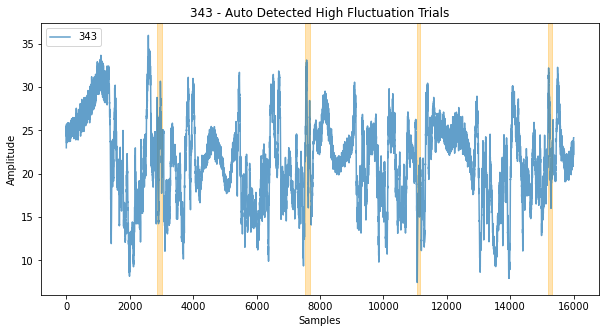


 Processing subcarrier: 250
 Detected 5 trials for 250:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_1387_1517.csv (range 1387-1517)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_2832_2942.csv (range 2832-2942)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_9267_9387.csv (range 9267-9387)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_10389_10509.csv (range 10389-10509)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_14915_15049.csv (range 14915-15049)


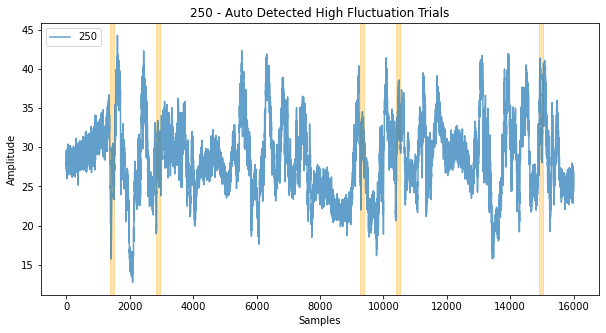


 Processing subcarrier: 253
 Detected 5 trials for 253:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_1377_1511.csv (range 1377-1511)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_2792_2956.csv (range 2792-2956)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_13744_13865.csv (range 13744-13865)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_14987_15112.csv (range 14987-15112)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_15254_15375.csv (range 15254-15375)


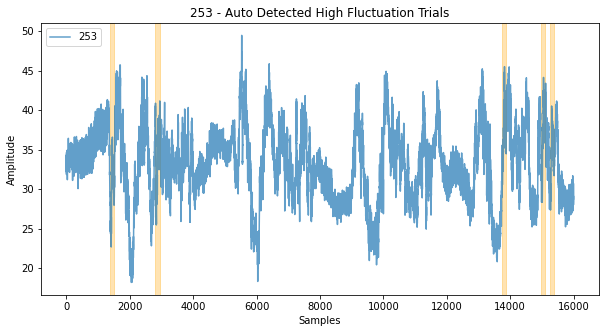

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-2.csv"
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2"
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find top 3 subcarriers with highest variance ======
variances = df.var(axis=0)
top_subs = variances.nlargest(3).index   # top 3 subcarriers
print(f" Total subcarriers: {len(df.columns)}")
print(" Top 3 subcarriers with highest variance:")
for i, sub in enumerate(top_subs, start=1):
    print(f"  {i}. {sub} (Variance = {variances[sub]:.2f})")

# ====== Step 4: Loop through each subcarrier ======
window_size = 100  # adjust depending on signal smoothness
for sub in top_subs:
    print(f"\n Processing subcarrier: {sub}")
    signal = df[sub].values
    rolling_std = pd.Series(signal).rolling(window=window_size).std()

    # Detect high-fluctuation regions
    threshold = rolling_std.mean() + rolling_std.std()
    high_var = rolling_std > threshold

    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(high_var):
        if val and not in_segment:
            start = i
            in_segment = True
        elif not val and in_segment:
            end = i
            if end - start > window_size:
                segments.append((start, end))
            in_segment = False

    if in_segment:
        segments.append((start, len(signal)))

    # Save each detected region as a trial
    print(f" Detected {len(segments)} trials for {sub}:")
    for idx, (start_idx, end_idx) in enumerate(segments, start=1):
        trial = df.loc[start_idx:end_idx, [sub]]
        filename = os.path.join(save_path, f"trial_{sub}_{start_idx}_{end_idx}.csv")
        trial.to_csv(filename, index=False)
        print(f" Saved {filename} (range {start_idx}-{end_idx})")

    # Plot the signal with shaded trials
    plt.figure(figsize=(10, 5))
    plt.plot(signal, label=f'{sub}', alpha=0.7)
    for (start, end) in segments:
        plt.axvspan(start, end, color='orange', alpha=0.3)
    plt.title(f"{sub} - Auto Detected High Fluctuation Trials")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


## Making trials for highest 3 variances of subcarriers for Subj-1_Area-1_Act-3

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3
 Total subcarriers: 360
 Top 3 subcarriers with highest variance:
  1. 349 (Variance = 23.10)
  2. 79 (Variance = 19.61)
  3. 346 (Variance = 19.20)

 Processing subcarrier: 349
 Detected 9 trials for 349:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_6910_7038.csv (range 6910-7038)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_8061_8221.csv (range 8061-8221)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_10249_10416.csv (range 10249-10416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_11241_11416.csv (range 11241-11416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_12539_12785.csv (range 12539-12785)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_14910_15176.csv (range 14910-15176)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_15872_16003.csv (range 15872-16003)
 Saved D:/PROJECT/Dataset/Trials_Subj

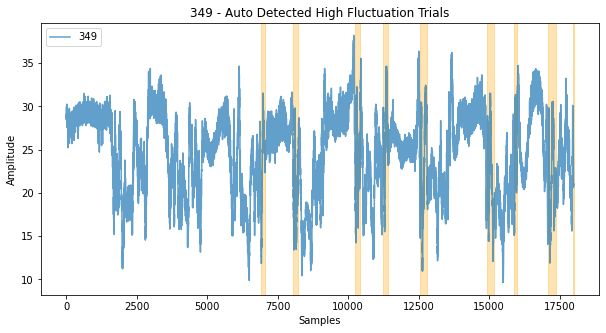


 Processing subcarrier: 79
 Detected 12 trials for 79:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_5880_6015.csv (range 5880-6015)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_6909_7035.csv (range 6909-7035)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_8062_8216.csv (range 8062-8216)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_9094_9268.csv (range 9094-9268)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_10204_10416.csv (range 10204-10416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_11234_11457.csv (range 11234-11457)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_12488_12699.csv (range 12488-12699)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_13521_13709.csv (range 13521-13709)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_14876_15057.csv (range 14876-15057)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_15882_16067.csv 

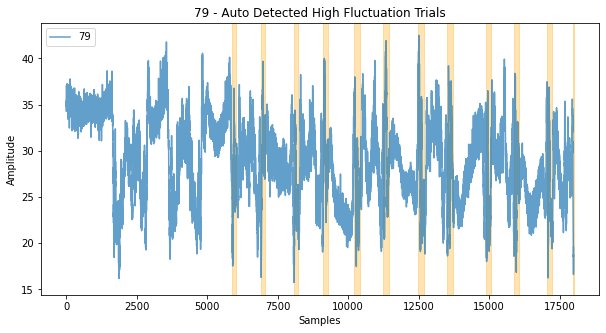


 Processing subcarrier: 346
 Detected 10 trials for 346:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_1687_1800.csv (range 1687-1800)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_2805_2936.csv (range 2805-2936)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_5892_6022.csv (range 5892-6022)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_6914_7034.csv (range 6914-7034)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_8061_8224.csv (range 8061-8224)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_10257_10424.csv (range 10257-10424)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_12495_12779.csv (range 12495-12779)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_14908_15103.csv (range 14908-15103)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_17054_17293.csv (range 17054-17293)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_17965_17

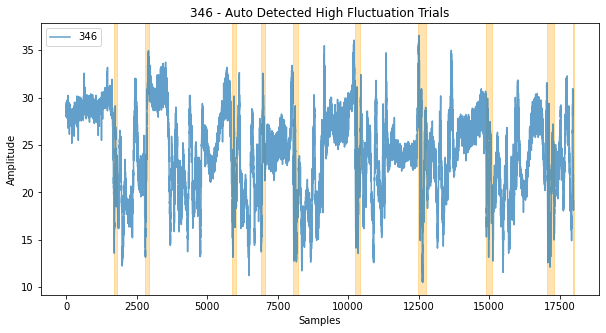

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-3.csv"
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3"
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find top 3 subcarriers with highest variance ======
variances = df.var(axis=0)
top_subs = variances.nlargest(3).index   # top 3 subcarriers
print(f" Total subcarriers: {len(df.columns)}")
print(" Top 3 subcarriers with highest variance:")
for i, sub in enumerate(top_subs, start=1):
    print(f"  {i}. {sub} (Variance = {variances[sub]:.2f})")

# ====== Step 4: Loop through each subcarrier ======
window_size = 100  # adjust depending on signal smoothness
for sub in top_subs:
    print(f"\n Processing subcarrier: {sub}")
    signal = df[sub].values
    rolling_std = pd.Series(signal).rolling(window=window_size).std()

    # Detect high-fluctuation regions
    threshold = rolling_std.mean() + rolling_std.std()
    high_var = rolling_std > threshold

    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(high_var):
        if val and not in_segment:
            start = i
            in_segment = True
        elif not val and in_segment:
            end = i
            if end - start > window_size:
                segments.append((start, end))
            in_segment = False

    if in_segment:
        segments.append((start, len(signal)))

    # Save each detected region as a trial
    print(f" Detected {len(segments)} trials for {sub}:")
    for idx, (start_idx, end_idx) in enumerate(segments, start=1):
        trial = df.loc[start_idx:end_idx, [sub]]
        filename = os.path.join(save_path, f"trial_{sub}_{start_idx}_{end_idx}.csv")
        trial.to_csv(filename, index=False)
        print(f" Saved {filename} (range {start_idx}-{end_idx})")

    # Plot the signal with shaded trials
    plt.figure(figsize=(10, 5))
    plt.plot(signal, label=f'{sub}', alpha=0.7)
    for (start, end) in segments:
        plt.axvspan(start, end, color='orange', alpha=0.3)
    plt.title(f"{sub} - Auto Detected High Fluctuation Trials")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


## Making trials for highest 3 variances of subcarriers for all the activities

In [ ]:
import os
import pandas as pd
import numpy as np

# ---------- Paths ----------
input_folder = "D:/PROJECT/Dataset/DatasetCSV"
output_base = "D:/PROJECT/Dataset"

# ---------- Parameters ----------
window_size = 100  # for rolling std
threshold_factor = 1.5  # threshold multiplier

# ---------- Function to find trials ----------
def find_trials(signal, window_size=100, threshold_factor=1.5):
    rolling_std = pd.Series(signal).rolling(window=window_size).std().fillna(0)
    threshold = rolling_std.mean() + threshold_factor * rolling_std.std()
    high_var = rolling_std > threshold

    trials = []
    start = None
    for i, active in enumerate(high_var):
        if active and start is None:
            start = i
        elif not active and start is not None:
            end = i
            if end - start > window_size:  # avoid very small noise regions
                trials.append((start, end))
            start = None
    if start is not None:
        trials.append((start, len(signal)))
    return trials

# ---------- Main processing ----------
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing: {file}")

        # Read CSV
        df = pd.read_csv(file_path)
        df = df.select_dtypes(include=[np.number])  # keep only numeric columns

        # Calculate variance for each subcarrier
        variances = df.var(axis=0)
        top3_indices = variances.nlargest(3).index  # top 3 subcarriers

        # Create output folder for this CSV
        file_name = os.path.splitext(file)[0]  # e.g. Subj-1_Area-1_Act-1
        output_folder = os.path.join(output_base, f"Trials_{file_name}")
        os.makedirs(output_folder, exist_ok=True)

        # Extract trials for each top subcarrier
        for sub_idx in top3_indices:
            signal = df[sub_idx].values
            trials = find_trials(signal, window_size, threshold_factor)

            for i, (start, end) in enumerate(trials, start=1):
                trial_data = df.iloc[start:end]
                trial_filename = f"trial_subcarrier_{sub_idx}_trial_{i}.csv"
                trial_path = os.path.join(output_folder, trial_filename)
                trial_data.to_csv(trial_path, index=False)

        print(f"Trials saved in: {output_folder}")

print("\n All CSV files processed successfully.")


Processing: subcarrier_variance_report.csv
Trials saved in: D:/PROJECT/Dataset\Trials_subcarrier_variance_report
Processing: Subj-10_Area-1_Act-1.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-1
Processing: Subj-10_Area-1_Act-10.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-10
Processing: Subj-10_Area-1_Act-2.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-2
Processing: Subj-10_Area-1_Act-3.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-3
Processing: Subj-10_Area-1_Act-4.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-4
Processing: Subj-10_Area-1_Act-5.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-5
Processing: Subj-10_Area-1_Act-6.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-6
Processing: Subj-10_Area-1_Act-7.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-7
Processing: Subj-10_Area-1_Act-8.csv
Trials saved in: D:/PROJECT/Dataset\Tria

## making separate activity folder for each activities

In [3]:
import os
import shutil

# Input folder (where all 300 trial folders are)
input_base = "D:/PROJECT/Dataset/All Trials"
# Output base folder (where 10 activity folders will be created)
output_base = "D:/PROJECT/Dataset/Separate Activities"

# Create 10 activity folders
for i in range(1, 11):
    os.makedirs(os.path.join(output_base, f"Activity_{i}"), exist_ok=True)

# Loop through all subfolders in All Trials
for folder in os.listdir(input_base):
    folder_path = os.path.join(input_base, folder)
    if os.path.isdir(folder_path) and folder.startswith("Trials_"):
        # Example: Trials_Subj-1_Area-1_Act-1
        parts = folder.split('_')
        act_part = [p for p in parts if p.startswith("Act-")]
        if act_part:
            act_num = act_part[0].split('-')[1]  # Extract activity number
            dest_folder = os.path.join(output_base, f"Activity_{act_num}", folder)

            # Copy the entire folder (with all its CSVs)
            shutil.copytree(folder_path, dest_folder, dirs_exist_ok=True)

            print(f" Moved {folder} → Activity_{act_num}/")

print("\n All trial folders grouped successfully by activity!")


 Moved Trials_Subj-10_Area-1_Act-1 → Activity_1/
 Moved Trials_Subj-10_Area-1_Act-10 → Activity_10/
 Moved Trials_Subj-10_Area-1_Act-2 → Activity_2/
 Moved Trials_Subj-10_Area-1_Act-3 → Activity_3/
 Moved Trials_Subj-10_Area-1_Act-4 → Activity_4/
 Moved Trials_Subj-10_Area-1_Act-5 → Activity_5/
 Moved Trials_Subj-10_Area-1_Act-6 → Activity_6/
 Moved Trials_Subj-10_Area-1_Act-7 → Activity_7/
 Moved Trials_Subj-10_Area-1_Act-8 → Activity_8/
 Moved Trials_Subj-10_Area-1_Act-9 → Activity_9/
 Moved Trials_Subj-10_Area-2_Act-1 → Activity_1/
 Moved Trials_Subj-10_Area-2_Act-10 → Activity_10/
 Moved Trials_Subj-10_Area-2_Act-2 → Activity_2/
 Moved Trials_Subj-10_Area-2_Act-3 → Activity_3/
 Moved Trials_Subj-10_Area-2_Act-4 → Activity_4/
 Moved Trials_Subj-10_Area-2_Act-5 → Activity_5/
 Moved Trials_Subj-10_Area-2_Act-6 → Activity_6/
 Moved Trials_Subj-10_Area-2_Act-7 → Activity_7/
 Moved Trials_Subj-10_Area-2_Act-8 → Activity_8/
 Moved Trials_Subj-10_Area-2_Act-9 → Activity_9/
 Moved Trials_Su

## making csv file for each activity irrespective of area and person and a combined csv for all activities

In [2]:
import os
import pandas as pd

# Base folder where Activity_1 ... Activity_10 exist
base_folder = "D:/PROJECT/Dataset/Separate Activities"   # change if needed
combined_data = []

# Loop through all activity folders
for activity_num in range(1, 11):  # Activity 1 to 10
    activity_folder = os.path.join(base_folder, f"Activity_{activity_num}")
    
    if not os.path.exists(activity_folder):
        print(f" Folder not found: {activity_folder}")
        continue

    print(f" Processing Activity {activity_num} ...")
    activity_data = []

    # Walk through all subfolders (recursive search)
    for root, _, files in os.walk(activity_folder):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                df["Activity"] = activity_num  # Label the activity
                activity_data.append(df)

    # Merge all CSVs for this activity
    if activity_data:
        merged_df = pd.concat(activity_data, ignore_index=True)

        # Save individual merged file for this activity
        activity_output = os.path.join(base_folder, f"Activity_{activity_num}.csv")
        merged_df.to_csv(activity_output, index=False)
        print(f" Saved merged file: {activity_output} ({len(merged_df)} rows)")

        # Add to combined dataset list
        combined_data.append(merged_df)
    else:
        print(f" No CSVs found in {activity_folder}")

# Combine all activities into one master file
if combined_data:
    all_activities_df = pd.concat(combined_data, ignore_index=True)
    final_output = os.path.join(base_folder, "All_Activities.csv")
    all_activities_df.to_csv(final_output, index=False)
    print(f"\n All activities merged into one file:")
    print(f" {final_output} ({len(all_activities_df)} total rows)")
else:
    print("No data found in any activity folder.")

 Processing Activity 1 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_1.csv (23806 rows)
 Processing Activity 2 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_2.csv (30829 rows)
 Processing Activity 3 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_3.csv (41213 rows)
 Processing Activity 4 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_4.csv (88729 rows)
 Processing Activity 5 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_5.csv (47177 rows)
 Processing Activity 6 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_6.csv (76207 rows)
 Processing Activity 7 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_7.csv (42118 rows)
 Processing Activity 8 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_8.csv (83787 rows)
 Processing Activity 9 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Ac

In [1]:
import pandas as pd

df = pd.read_csv("D:/PROJECT/Dataset/Separate Activities/All_Activities.csv")
print("Rows:", len(df))
print("Columns:", df.shape[1])
print("Preview:\n", df.head())

Rows: 547913
Columns: 361
Preview:
            0          1         2          3          4         5          6  \
0  18.073202  18.246650  7.465869  22.002917  19.384436  7.625449  24.025968   
1  18.388954  16.454211  7.098850  21.035943  17.464873  7.258120  23.560844   
2  19.261217  15.322663  7.291119  22.472065  16.065906  6.875369  24.626590   
3  18.754889  16.084174  6.989266  22.196819  16.810314  6.598683  23.784401   
4  18.900982  15.870929  7.082603  21.181804  17.453512  7.437102  23.469995   

           7         8          9  ...        351       352        353  \
0  13.345309  8.705307  27.103857  ...  25.105587  5.968391  32.422082   
1  11.763525  9.014679  27.088122  ...  25.930243  6.184563  31.842294   
2  10.758409  8.851520  27.446913  ...  22.792432  7.683239  31.585686   
3  12.399098  8.306623  26.052412  ...  17.525547  8.952600  30.889409   
4  12.497901  8.319877  26.541748  ...  19.754389  6.583775  31.638361   

         354       355        356     

In [2]:
import os
import pandas as pd

base_folder = "D:/PROJECT/Dataset/Separate Activities"

records = []

for activity_num in range(1, 11):

    activity_folder = os.path.join(base_folder, f"Activity_{activity_num}")
    print(f"Processing Activity {activity_num}")

    if not os.path.exists(activity_folder):
        print("Folder not found!", activity_folder)
        continue

    # Walk through all subfolders
    for root, dirs, files in os.walk(activity_folder):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)

                # store full CSV + activity label
                records.append({
                    "data": df,
                    "label": activity_num
                })

dataset_df = pd.DataFrame(records)
print(dataset_df.head())

print("\nTotal records loaded:", len(dataset_df))


Processing Activity 1
Processing Activity 2
Processing Activity 3
Processing Activity 4
Processing Activity 5
Processing Activity 6
Processing Activity 7
Processing Activity 8
Processing Activity 9
Processing Activity 10
                                                data  label
0               0          1         2          3...      1
1               0          1         2          3...      1
2               0          1         2          3...      1
3               0          1         2          3...      1
4               0          1         2          3...      1

Total records loaded: 3844


In [1]:
import os
import pandas as pd
import numpy as np

def load_csv_matrices(parent_folder):
    data_rows = []

    # iterate through all subfolders
    for folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder)
        
        if not os.path.isdir(folder_path):
            continue
        
        label = folder  # folder name is the label
        
        # read CSV files inside this folder
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                file_path = os.path.join(folder_path, file)

                # read CSV as a 100x180 matrix, do NOT reshape
                matrix = pd.read_csv(file_path, header=None).values

                # ensure shape is preserved
                if matrix.shape != (100, 180):
                    print(f"Warning: {file_path} shape is {matrix.shape}, expected 100x180.")

                data_rows.append({
                    "label": label,
                    "filename": file,
                    "matrix": matrix
                })

    df = pd.DataFrame(data_rows)
    return df


# --------- Usage ----------
parent_directory = "D:/PROJECT/Dataset/Separate Activities/Activity_1"
df = load_csv_matrices(parent_directory)

print(df.head())
print("Total CSV files loaded:", len(df))

                         label                          filename  \
0  Trials_Subj-10_Area-1_Act-1  trial_subcarrier_157_trial_1.csv   
1  Trials_Subj-10_Area-1_Act-1  trial_subcarrier_346_trial_1.csv   
2  Trials_Subj-10_Area-1_Act-1  trial_subcarrier_349_trial_1.csv   
3  Trials_Subj-10_Area-2_Act-1  trial_subcarrier_162_trial_1.csv   
4  Trials_Subj-10_Area-2_Act-1  trial_subcarrier_162_trial_2.csv   

                                              matrix  
0  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
1  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
2  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
3  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
4  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
Total CSV files loaded: 138


## merging trials to reduce folders

In [1]:
import os
import shutil

# Original source folders
source_root = r"D:/PROJECT/Dataset/Separate Activities"

# NEW output root where you want flattened folders
output_root = r"D:/PROJECT/Dataset/MergedActivities"

os.makedirs(output_root, exist_ok=True)

for activity in os.listdir(source_root):
    activity_path = os.path.join(source_root, activity)
    if not os.path.isdir(activity_path):
        continue

    print(f"Processing {activity} ...")

    # Create output folder for this activity
    activity_output = os.path.join(output_root, activity)
    os.makedirs(activity_output, exist_ok=True)

    # Loop inside Activity folder
    for subfolder in os.listdir(activity_path):
        subfolder_path = os.path.join(activity_path, subfolder)

        # We only process folders like: Trials_Subj-1_Area-1_Act-1
        if os.path.isdir(subfolder_path) and subfolder.startswith("Trials_"):

            # Extract Subj and Area from folder name
            parts = subfolder.split("_")
            subj = parts[1]     # Subj-1
            area = parts[2]     # Area-1

            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):

                    src = os.path.join(subfolder_path, file)

                    # NEW filename → just add Subj and Area
                    new_filename = f"{subj}_{area}_{file}"

                    dest = os.path.join(activity_output, new_filename)

                    # Copy file to new structure
                    shutil.copy(src, dest)

print("\n Done! All CSVs flattened into new activity folders.")

Processing Activity_1 ...
Processing Activity_10 ...
Processing Activity_2 ...
Processing Activity_3 ...
Processing Activity_4 ...
Processing Activity_5 ...
Processing Activity_6 ...
Processing Activity_7 ...
Processing Activity_8 ...
Processing Activity_9 ...

 Done! All CSVs flattened into new activity folders.


## making uniform csvs files (100*360)

In [1]:
import os
import pandas as pd
import numpy as np

# -----------------------------
# Function to fix matrix size
# -----------------------------
def fix_matrix_size(matrix, target_rows=100, target_cols=360):

    rows, cols = matrix.shape

    # ---- Fix columns ----
    if cols < target_cols:
        pad_cols = target_cols - cols
        matrix = np.hstack([matrix, np.zeros((rows, pad_cols))])

    elif cols > target_cols:
        matrix = matrix[:, :target_cols]

    # ---- Fix rows ----
    if rows < target_rows:
        pad_rows = target_rows - rows
        matrix = np.vstack([matrix, np.zeros((pad_rows, target_cols))])

    elif rows > target_rows:
        start = (rows - target_rows) // 2
        end = start + target_rows
        matrix = matrix[start:end, :]

    return matrix


# -----------------------------
# Main processing function
# -----------------------------
def resize_and_save(input_root, output_root):

    # Create output root folder if not exists
    os.makedirs(output_root, exist_ok=True)

    for activity in os.listdir(input_root):
        activity_path = os.path.join(input_root, activity)

        if not os.path.isdir(activity_path):
            continue

        # Make output folder for this activity
        out_activity_folder = os.path.join(output_root, activity)
        os.makedirs(out_activity_folder, exist_ok=True)

        # Traverse through all subfolders (Trials_Subj_x_Area_y)
        for subfolder in os.listdir(activity_path):
            sub_path = os.path.join(activity_path, subfolder)

            if not os.path.isdir(sub_path):
                continue

            # Read all CSVs inside trial folders
            for file in os.listdir(sub_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(sub_path, file)

                    # Read CSV to matrix
                    matrix = pd.read_csv(file_path, header=None).values

                    # Resize to 100x360
                    matrix = fix_matrix_size(matrix, 100, 360)

                    # Save to new path
                    new_filename = f"{subfolder}_{file}"  # adds subject/area info
                    output_file = os.path.join(out_activity_folder, new_filename)

                    pd.DataFrame(matrix).to_csv(output_file, index=False, header=False)

        print(f"Done → {activity}")


# -----------------------------
# USAGE
# -----------------------------
input_path = r"D:/PROJECT/Dataset/Separate Activities"
output_path = r"D:/PROJECT/Dataset/Resized_Activities"

resize_and_save(input_path, output_path)

print("ALL FILES RESIZED & SAVED SUCCESSFULLY!")


Done → Activity_1
Done → Activity_10
Done → Activity_2
Done → Activity_3
Done → Activity_4
Done → Activity_5
Done → Activity_6
Done → Activity_7
Done → Activity_8
Done → Activity_9
ALL FILES RESIZED & SAVED SUCCESSFULLY!


## making dataframe

In [1]:
import os
import pandas as pd

def build_activity_dataframe(parent_folder):
    rows = []

    for activity in os.listdir(parent_folder):
        activity_path = os.path.join(parent_folder, activity)

        if not os.path.isdir(activity_path):
            continue

        # Extract activity number: "Activity_1" → 1
        activity_num = int(activity.split("_")[1])

        for file in os.listdir(activity_path):
            if file.endswith(".csv"):
                file_path = os.path.join(activity_path, file)

                # Read matrix (100 × 360)
                matrix = pd.read_csv(file_path, header=None).values

                rows.append({
                    "Activity": activity_num,
                    "Matrix": matrix
                })

    df = pd.DataFrame(rows)
    return df


# -------- Usage --------
parent_dir = r"D:/PROJECT/Dataset/Resized_Activities"
df = build_activity_dataframe(parent_dir)

print(df.head())
print("\nTotal samples loaded:", len(df))


   Activity                                             Matrix
0         1  [[20.084027652826865, 19.719656206413944, 6.98...
1         1  [[20.321905229349447, 20.24197399023708, 7.800...
2         1  [[19.1127841076676, 20.08191876442749, 7.09181...
3         1  [[21.27302232271727, 12.53655155158857, 2.1442...
4         1  [[19.576205858419808, 16.145092509803987, 2.34...

Total samples loaded: 3844


In [2]:
print(df["Activity"].unique())


[ 1 10  2  3  4  5  6  7  8  9]


In [3]:
df["Activity"].value_counts()

4     600
8     580
6     520
9     448
5     349
10    328
7     317
3     316
2     248
1     138
Name: Activity, dtype: int64

In [6]:
df.to_csv("D:/PROJECT/Dataset/final_dataset.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Activity  3844 non-null   int64 
 1   Matrix    3844 non-null   object
dtypes: int64(1), object(1)
memory usage: 60.2+ KB
